使用Pytorch生成CNN

In [4]:
import torch
import numpy as np
from torch import nn
from torch.autograd import Variable
import torch.nn.functional as F   # 注意
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
img = Image.open('./cat.png').convert('L') #使用灰度的方式，读取图片

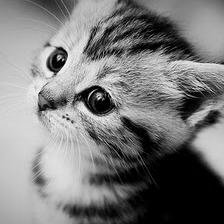

In [11]:
img

In [17]:
img = np.array(img,dtype='float32')

In [18]:
img.size

50176

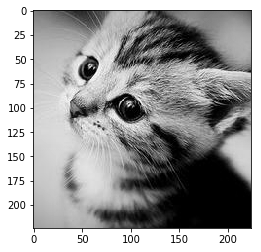

In [19]:
plt.imshow(img.astype('uint8'),cmap='gray')  # uint8 会映射为0-255

In [20]:
img.shape

(224, 224)

In [21]:
im=torch.from_numpy(img_np.reshape(1,1,img.shape[0],img.shape[1]))

使用CNN

In [23]:
con1=nn.Conv2d(1,1,3,bias=False) #定义卷积

In [24]:
con1.weight

Parameter containing:
tensor([[[[-0.1221, -0.0502,  0.1741],
          [ 0.1266,  0.2957, -0.1484],
          [ 0.2545, -0.0649,  0.1340]]]], requires_grad=True)

In [44]:
sobel_kernel=np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]],dtype='float32')  

In [45]:
sobel_kernel

array([[-1., -1., -1.],
       [-1.,  8., -1.],
       [-1., -1., -1.]], dtype=float32)

更新kernel,sobel_kernel转化为Conv2d接受的Variable的变量(batch, channel, H, W)，其中 batch 表示输入的一批数据的数目，第二个是输入的通道数，一般一张彩色的图片是 3，灰度图是 1，而卷积网络过程中的通道数比较大，会出现几十到几百的通道数，H 和 W 表示输入图片的高度和宽度，比如一个 batch 是 32 张图片，每张图片是 3 通道，高和宽分别是 50 和 100，那么输入的大小就是 (32, 3, 50, 100)

In [46]:
sobel_kernel=sobel_kernel.reshape((1,1,3,3)) # reshape要接受元组

In [47]:
sobel_kernel

array([[[[-1., -1., -1.],
         [-1.,  8., -1.],
         [-1., -1., -1.]]]], dtype=float32)

In [48]:
con1.weight.data=torch.from_numpy(sobel_kernel)

In [49]:
edge1 = con1(Variable(im)) # 作用在图片上

In [50]:
edge1

tensor([[[[ 3.,  2., -3.,  ..., -6., -3., -6.],
          [ 6.,  4.,  6.,  ...,  0.,  2., -3.],
          [ 6.,  2.,  1.,  ..., -5., -4.,  0.],
          ...,
          [ 1., -1., -4.,  ...,  0.,  0.,  0.],
          [-1., -3.,  3.,  ...,  0.,  0.,  0.],
          [-4.,  2., -1.,  ...,  0.,  0.,  0.]]]],
       grad_fn=<MkldnnConvolutionBackward>)

In [51]:
edge1=edge1.data.squeeze().numpy() #转化为图片格式

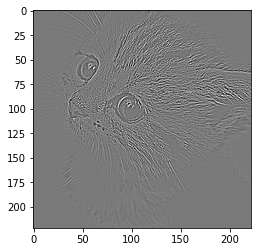

In [52]:
plt.imshow(edge1,cmap='gray')

卷积核很重要，不同的配置，会有不同的效果